## Lesson 15

In [11]:
# Метод главных компонент PCA
# Алгортм обучения без уичтеля
# Часто ипользуют для понижения размерности

# задача - вяснение зависимости между признаками, признаки равны
# В PCA выпоняется качественная оценка той зависимости через поиск гланых осей координат и из использования для описания наборов данных


import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.naive_bayes import GaussianNB

from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor

from sklearn.decomposition import PCA

   sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa
    petal_width  petal_length
50          1.4           4.7
51          1.5           4.5
52          1.5           4.9
53          1.3           4.0
54          1.5           4.6
55          1.3           4.5
56          1.6           4.7
57          1.0           3.3
58          1.3           4.6
59          1.4           3.9
60          1.0           3.5
61          1.5           4.2
62          1.0           4.0
63          1.4           4.7
64          1.3           3.6
65          1.4           4.4
66          1.5           4.5
67          1.0           4.1
68          1.5           4.5
69          1.1 

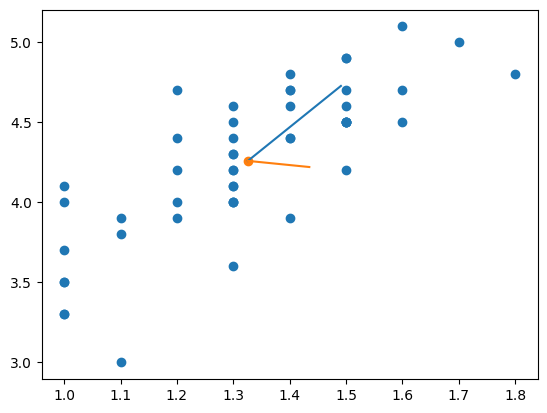

In [17]:
iris = sns.load_dataset("iris")
print(iris.head())
data = iris[['petal_width', 'petal_length','species']]
data_v = data[data['species']=='versicolor']

data_v = data_v.drop(columns = ['species'])
print(data_v)

X = data_v['petal_width']
Y = data_v['petal_length']

plt.scatter(X, Y)


p = PCA(n_components=2)
p.fit(data_v)

X_p = p.transform(data_v)


print(p.components_)
print(p.explained_variance_)
print(p.mean_)

plt.scatter(p.mean_[0], p.mean_[1])

plt.plot([p.mean_[0], p.mean_[0]+p.components_[0][0] * p.explained_variance_[0]**0.5], [p.mean_[1], p.mean_[1]+p.components_[0][1]* p.explained_variance_[0]**0.5] )
plt.plot([p.mean_[0], p.mean_[0]+p.components_[1][0] * p.explained_variance_[1]**0.5], [p.mean_[1], p.mean_[1]+p.components_[1][1]* p.explained_variance_[1]**0.5] )

   sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa
    petal_width  petal_length
50          1.4           4.7
51          1.5           4.5
52          1.5           4.9
53          1.3           4.0
54          1.5           4.6
55          1.3           4.5
56          1.6           4.7
57          1.0           3.3
58          1.3           4.6
59          1.4           3.9
60          1.0           3.5
61          1.5           4.2
62          1.0           4.0
63          1.4           4.7
64          1.3           3.6
65          1.4           4.4
66          1.5           4.5
67          1.0           4.1
68          1.5           4.5
69          1.1 

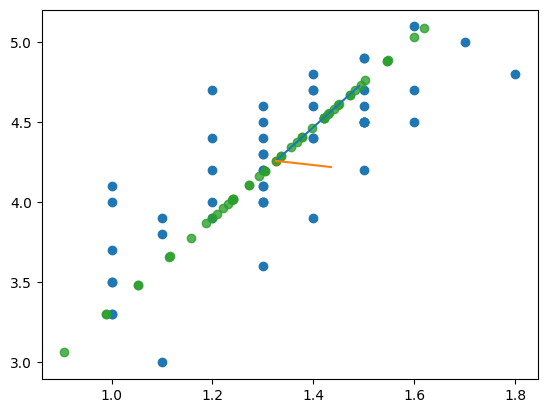

In [21]:
iris = sns.load_dataset("iris")
print(iris.head())
data = iris[['petal_width', 'petal_length','species']]
data_v = data[data['species']=='versicolor']

data_v = data_v.drop(columns = ['species'])
print(data_v)

X = data_v['petal_width']
Y = data_v['petal_length']

plt.scatter(X, Y)


p = PCA(n_components=2)
p.fit(data_v)



print(p.components_)
print(p.explained_variance_)
print(p.mean_)

plt.scatter(p.mean_[0], p.mean_[1])

plt.plot([p.mean_[0], p.mean_[0]+p.components_[0][0] * p.explained_variance_[0]**0.5], [p.mean_[1], p.mean_[1]+p.components_[0][1]* p.explained_variance_[0]**0.5] )
plt.plot([p.mean_[0], p.mean_[0]+p.components_[1][0] * p.explained_variance_[1]**0.5], [p.mean_[1], p.mean_[1]+p.components_[1][1]* p.explained_variance_[1]**0.5] )



p1 = PCA(n_components=1)
p1.fit(data_v)

X_p = p1.transform(data_v)
X_p_new = p1.inverse_transform(X_p)
print(X_p)

plt.scatter(X_p_new[:,0], X_p_new[:,1], alpha = 0.8)

# Простота интерпретации, эффективность в работе с многомерными данными
# Аномальные значения в данных оказывают сильное влияние